# Pandas Introduction


Pandas (Python Data Analysis Library) is a Python library whose purpose is to
allow one to do statistical data analysis easily in Python.
Pandas adds a new fundamental data type, the `DataFrame` to the Python
language.  The `DataFrame` is inspired by the data type with the same name
from the R statistical analysis programming envrionment.  `DataFrames`
give us easy ways to load, clean, analyse and massage a large data
set of values. The rest of the Pandas library adds methods to do
various complex statistical analysis on the data.  

Pandas is inspired by, and meant to replace functions one would do in
R with pure Python.  Though a relatively new library, Pandas has
quickly matured. Pandas is  designed with an eye towards computational performance.  It is already as good, if not often better than R
performance wise on very large data sets.

**References**

- [Pandas web site](http://pandas.pydata.org/)
- [Python for Data Analysis](http://www.amazon.com/Python-Data-Analysis-Wes-McKinney/dp/1449319793/ref=sr_1_1?ie=UTF8&qid=1377800910&sr=8-1&keywords=python+for+data+analysis) by Wes McKinney, 2012. (developer of Pandas) 
- [Pandas 10 minutes tutorial](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)

By convention we import pandas using `pd` as an alias name.  Pandas 
`DataFrame` objects work in conjunction with NumPy `ndarray` arrays,
and we will be using both in the following examples, so lets import
both of the needed libraries in the usual manner.

In [1]:
import numpy as np
import pandas as pd

The `DataFrame` object is the main object added by and implemented from
the Pandas library.  A `DataFrame` is basically a table of data, with
rows representing samples of data or subjects/individuals of a sampled
population.  The columns of a Pandas `DataFrame` represent what we
call in machine learning the individual **features** or **attributes**
of the data set.  Each column in Pandas is represented by what is
known as a `Series` object.  So a `DataFrame` is a collection of `Series`
that represent the columns or features of the data set.  All of the
`Series` or columns in the `DataFrame` have to be of the same length, so
that each attribute has 1 attribute for each row of the `DataFrame`.

One of the main differences between a Pandas `DataFrame` and a 2-dimensional
table in a NumPy array is that the `Series` attribute columns in a `DataFrame`
can be of different types, unlike in a NumPy array where all data in all
columns must be of the same type.  

The other major difference that a Pandas `DataFrame` provides is that 
all `Series` column attributes can be accessed with an attribute
name.  The rows and columns of a `DataFrame` can be accessed by
index values (and sliced) in ways we have seen for Python series and for
the NumPy array type.  But `DataFrame` `Series` columns can also be
accessed by and sliced by their attribute names.  This has become a 
common way to think of and organize a related data set, with rows
representing samples, and named attribute columns the data, that can
be accessed by these attribute names.

# Series 

Lets start first by creating some `Series` attributes by hand.

In [2]:
freq = pd.Series([1, 3, 5, np.nan, 6, 8], name='frequency')
freq

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
Name: frequency, dtype: float64

In [3]:
freq.dtype

dtype('float64')

In [4]:
freq.name

'frequency'

In [5]:
freq.size

6

In [6]:
freq.shape

(6,)

In [7]:
freq.ndim

1

In [8]:
freq.hasnans

True

A series represents a column of attribute data in a data set.  The reference API for a 
[pands Series](https://pandas.pydata.org/pandas-docs/stable/reference/series.html)

A series
can have a name that we will use to identify it, like we gave it here.
All of the values in a series will be of the same type.  As shown here,
the type will default to floats unless you explicitly request a type
or all values can be interpreted as a different type.

A `Series` can be accessed by index, like a Python sequence.

In [9]:
freq[0]

1.0

In [10]:
freq[:3]

0    1.0
1    3.0
2    5.0
Name: frequency, dtype: float64

In [11]:
freq[1::2]

1    3.0
3    NaN
5    8.0
Name: frequency, dtype: float64

# DataFrame

A `DataFrame` is a collection of named `Series` objects, where all `Series`
objects are of the same size and represent the column attributes of the
data set.

There are many ways to construct a `DataFrame` by hand.  

For example, on way that emphasize the series nature of the attributes and
the ide that each series has a name is to initialize the `DataFrame`
with a dictionary of `Series` or other items like NumPy arrays or 
other sequences of the same size.

In [12]:
data_dict = {
    'A': 1., # not a series or even of the correct size, scalars are repeated
    'B': pd.Timestamp('20200704'), # also only a single value, will be repeated
    'C': pd.Series(1, index=list(range(4)), dtype='float32'), # series of 4 floats
    'D': np.array([3] * 4, dtype='int32'), # 4 integers as a numpy array
    'D': pd.Categorical(['test', 'train', 'test', 'train']), # a categorical variable
    'F': pd.Series([1, 3, 5, np.nan]), # our freq Series from first example
    'G': 'foo', # a string
}

df = pd.DataFrame(data_dict)

In [13]:
df

,A,B,C,D,F,G
0,1.0,2020-07-04,1.0,test,1.0,foo
1,1.0,2020-07-04,1.0,train,3.0,foo
2,1.0,2020-07-04,1.0,test,5.0,foo
3,1.0,2020-07-04,1.0,train,NaN,foo


In [14]:
df.columns

Index(['A', 'B', 'C', 'D', 'F', 'G'], dtype='object')

In [15]:
df.index

Index([0, 1, 2, 3], dtype='int64')

In [16]:
df.dtypes

A           float64
B    datetime64[ns]
C           float32
D          category
F           float64
G            object
dtype: object

In [17]:
df.ndim

2

In [18]:
df.shape

(4, 6)

In [19]:
df.size

24

In [20]:
df.values

array([[1.0, Timestamp('2020-07-04 00:00:00'), 1.0, 'test', 1.0, 'foo'],
       [1.0, Timestamp('2020-07-04 00:00:00'), 1.0, 'train', 3.0, 'foo'],
       [1.0, Timestamp('2020-07-04 00:00:00'), 1.0, 'test', 5.0, 'foo'],
       [1.0, Timestamp('2020-07-04 00:00:00'), 1.0, 'train', nan, 'foo']],
      dtype=object)

The reference API for a
[pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)


We showed some of the attributes you can access for a data frame, like the column names,
the `dtypes` data types for each column, the `DataFrame` shape, etc.  

The `df.values` actually creates and returns a NumPy array of the `DataFrame`.  As you can see here,
if you have values of different types, especially things like strings, the resulting array will have to 
be of the general `object` type.  But if your `DataFrame` (or some columns you select) are all
numerical, the resulting NumPy array can be of a numerical type.


Notice that when we create the DataFrame, the number of rows ended up being 4.  Some of the attributes
in our data dictionary were scalar values (only a single value).  Scalar values will simply get repeated
the number of times needed so that their `Series` size matches the number of rows or attribute size of
the `DataFrame`.  All attribute series will be expanded to the largest series size when creating
a `DataFrame`.  Scalar or single values will be repeated, but `Series` that are too small will get filled
in with missing `NaN` values.

In [21]:
data_dict = {
    'A': pd.Series([1, 2, 3, 4, 5]), # only have 5 items for this attribute
    'B': pd.Series([1.0, 2.0, 3.0, 4.0, 5.0, 6.0]),
}
df2 = pd.DataFrame(data_dict)

In [22]:
df2

,A,B
0,1.0,1.0
1,2.0,2.0
2,3.0,3.0
3,4.0,4.0
4,5.0,5.0
5,NaN,6.0


One other quick thing to mention, each column `Series` of a `DataFrame` is also accessible as a 
member attribute of the `DataFrame.

In [23]:
df.B

0   2020-07-04
1   2020-07-04
2   2020-07-04
3   2020-07-04
Name: B, dtype: datetime64[ns]

In [24]:
df.F

0    1.0
1    3.0
2    5.0
3    NaN
Name: F, dtype: float64

In [25]:
df2.B

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
Name: B, dtype: float64

## Viewing Data

Lets create a bigger data frame and fill it in with some random values.
Here we also create an index for our `DataFrame`.  By default an integer index starting
at 0 is created to index the rows of a `DataFrame`.  But you can have a more complex
value as a row index, as long as all index values are unique.

In [26]:
dates = pd.date_range('20200701', periods=60) # 60 days starting July 1 2020
dates

DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04',
               '2020-07-05', '2020-07-06', '2020-07-07', '2020-07-08',
               '2020-07-09', '2020-07-10', '2020-07-11', '2020-07-12',
               '2020-07-13', '2020-07-14', '2020-07-15', '2020-07-16',
               '2020-07-17', '2020-07-18', '2020-07-19', '2020-07-20',
               '2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24',
               '2020-07-25', '2020-07-26', '2020-07-27', '2020-07-28',
               '2020-07-29', '2020-07-30', '2020-07-31', '2020-08-01',
               '2020-08-02', '2020-08-03', '2020-08-04', '2020-08-05',
               '2020-08-06', '2020-08-07', '2020-08-08', '2020-08-09',
               '2020-08-10', '2020-08-11', '2020-08-12', '2020-08-13',
               '2020-08-14', '2020-08-15', '2020-08-16', '2020-08-17',
               '2020-08-18', '2020-08-19', '2020-08-20', '2020-08-21',
               '2020-08-22', '2020-08-23', '2020-08-24', '2020-08-25',
      

In [27]:
# data frame with 60 rows, indexed by date, and 26 columns all filled with random values
data = np.random.randn(60, 26)
columns = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
df = pd.DataFrame(data, index=dates, columns=columns)

In [28]:
df.shape

(60, 26)

`DataFrame` objects have many member methods to access, view and manipulate the data.
Again check the API reference for a full list.

Get the top and bottom rows of the frame:

In [29]:
# shows first 5 by default
df.head()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
2020-07-01,-0.339124,-1.595727,2.463421,-0.399145,-0.831561,0.352225,1.897463,-0.208338,0.938499,-0.225589,...,1.106802,-0.002601,-0.050885,-1.501457,0.847465,-0.848446,-1.606421,1.843077,0.661683,-0.898113
2020-07-02,0.008141,-0.277396,-1.421445,-0.066448,-0.582156,0.014527,-0.810637,0.297220,0.021092,-0.019721,...,-0.960831,-0.901567,0.353605,1.071079,0.444147,-0.653477,0.644296,-0.712237,-0.121220,1.705635
2020-07-03,1.472629,-0.830318,0.367386,-0.313058,1.228517,0.400668,-1.055224,-1.518390,0.938429,-0.308239,...,0.124165,1.297936,-0.893693,-0.397997,0.346712,0.486572,0.041933,1.457854,-0.533405,1.541793
2020-07-04,0.909879,0.172179,0.924450,-0.611587,0.732536,-0.323058,1.182851,-0.737620,-2.378034,-1.715647,...,-1.192428,0.610366,-0.148692,0.414083,-1.928724,-0.307870,1.600613,0.019270,-0.092663,1.270217
2020-07-05,1.016027,0.666449,-1.093494,-0.220522,0.785498,0.044602,0.926409,-1.720612,0.105345,1.664046,...,-0.190868,1.505316,1.350177,-0.783539,0.765620,-0.053998,-0.081979,2.085879,2.265007,0.573576


In [30]:
# last 3 sample rows
df.tail(3)

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
2020-08-27,0.596333,0.324243,-1.235408,-0.750630,0.201162,-0.388090,-1.329999,-0.207969,0.258371,0.628738,...,-0.102338,0.668403,1.088513,0.081532,-0.507567,-0.931741,-0.077044,-0.849623,-0.688104,-0.803072
2020-08-28,1.219683,-2.513931,-0.212952,-0.331051,0.540471,-0.910914,-0.159861,-0.735103,1.123806,0.206131,...,-1.018902,-1.536725,1.091037,-0.592401,0.906410,-0.581769,-1.355692,-0.732572,-0.918461,-1.065268
2020-08-29,1.301694,-0.419306,0.208880,1.283644,1.323655,-0.377678,0.627849,-1.354829,-0.733439,0.110260,...,-0.447016,1.611578,0.095390,-0.750960,0.114563,0.907601,-0.586011,0.854744,-1.130336,0.432480


We already demontrated you can access any column attribute by name.  You can also access the index:

In [31]:
df.index

DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04',
               '2020-07-05', '2020-07-06', '2020-07-07', '2020-07-08',
               '2020-07-09', '2020-07-10', '2020-07-11', '2020-07-12',
               '2020-07-13', '2020-07-14', '2020-07-15', '2020-07-16',
               '2020-07-17', '2020-07-18', '2020-07-19', '2020-07-20',
               '2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24',
               '2020-07-25', '2020-07-26', '2020-07-27', '2020-07-28',
               '2020-07-29', '2020-07-30', '2020-07-31', '2020-08-01',
               '2020-08-02', '2020-08-03', '2020-08-04', '2020-08-05',
               '2020-08-06', '2020-08-07', '2020-08-08', '2020-08-09',
               '2020-08-10', '2020-08-11', '2020-08-12', '2020-08-13',
               '2020-08-14', '2020-08-15', '2020-08-16', '2020-08-17',
               '2020-08-18', '2020-08-19', '2020-08-20', '2020-08-21',
               '2020-08-22', '2020-08-23', '2020-08-24', '2020-08-25',
      

In [32]:
df.F

2020-07-01    0.352225
2020-07-02    0.014527
2020-07-03    0.400668
2020-07-04   -0.323058
2020-07-05    0.044602
2020-07-06    0.885246
2020-07-07   -0.747493
2020-07-08    1.074689
2020-07-09    0.137099
2020-07-10   -1.058295
2020-07-11    0.052720
2020-07-12   -0.604827
2020-07-13    0.802061
2020-07-14   -0.749966
2020-07-15   -1.408303
2020-07-16   -0.500172
2020-07-17   -0.166873
2020-07-18   -0.352475
2020-07-19   -0.130130
2020-07-20   -0.230622
2020-07-21    2.093118
2020-07-22   -2.596855
2020-07-23    0.652054
2020-07-24   -0.117168
2020-07-25    1.716196
2020-07-26    1.000107
2020-07-27   -0.369387
2020-07-28   -0.812111
2020-07-29   -0.203956
2020-07-30   -0.280974
2020-07-31    0.885784
2020-08-01    0.850987
2020-08-02    0.639219
2020-08-03   -0.829218
2020-08-04    0.450995
2020-08-05   -0.953682
2020-08-06   -1.413135
2020-08-07   -0.938212
2020-08-08    0.638731
2020-08-09   -0.060404
2020-08-10   -1.519115
2020-08-11   -0.091670
2020-08-12    0.594410
2020-08-13 

The `to_numpy()` member function is what is called when you access the `.values` member attribute, so you
can use either to convert the `DataFrame` into a NumPy array.  

Notice here, since all columns are numerical, the resulting NumPy array has a float dtype.

In [33]:
df.to_numpy()

array([[-0.3391243 , -1.5957275 ,  2.46342105, ...,  1.84307663,
         0.66168338, -0.89811262],
       [ 0.00814124, -0.27739625, -1.42144458, ..., -0.71223723,
        -0.12122027,  1.70563509],
       [ 1.47262907, -0.83031813,  0.36738557, ...,  1.45785388,
        -0.53340536,  1.54179281],
       ...,
       [ 0.59633339,  0.32424298, -1.23540751, ..., -0.84962317,
        -0.68810419, -0.80307245],
       [ 1.21968304, -2.5139305 , -0.21295177, ..., -0.73257151,
        -0.918461  , -1.06526848],
       [ 1.3016939 , -0.41930619,  0.20888015, ...,  0.85474369,
        -1.13033642,  0.43247953]])

In [34]:
df.to_numpy().dtype

dtype('float64')

In [35]:
df.values

array([[-0.3391243 , -1.5957275 ,  2.46342105, ...,  1.84307663,
         0.66168338, -0.89811262],
       [ 0.00814124, -0.27739625, -1.42144458, ..., -0.71223723,
        -0.12122027,  1.70563509],
       [ 1.47262907, -0.83031813,  0.36738557, ...,  1.45785388,
        -0.53340536,  1.54179281],
       ...,
       [ 0.59633339,  0.32424298, -1.23540751, ..., -0.84962317,
        -0.68810419, -0.80307245],
       [ 1.21968304, -2.5139305 , -0.21295177, ..., -0.73257151,
        -0.918461  , -1.06526848],
       [ 1.3016939 , -0.41930619,  0.20888015, ...,  0.85474369,
        -1.13033642,  0.43247953]])

In [36]:
df.values.dtype

dtype('float64')

Note that `to_numpy()` and `.values` do not include the column names nor the index, as these
are features particular to `DataFrames` and are not how NumPy arrays are organized or accessed.

## Selecting Data

You can slice data frames rows by numerical indexes, like NumPy arrays.

In [37]:
# first 3 rows
df[0:3]

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
2020-07-01,-0.339124,-1.595727,2.463421,-0.399145,-0.831561,0.352225,1.897463,-0.208338,0.938499,-0.225589,...,1.106802,-0.002601,-0.050885,-1.501457,0.847465,-0.848446,-1.606421,1.843077,0.661683,-0.898113
2020-07-02,0.008141,-0.277396,-1.421445,-0.066448,-0.582156,0.014527,-0.810637,0.297220,0.021092,-0.019721,...,-0.960831,-0.901567,0.353605,1.071079,0.444147,-0.653477,0.644296,-0.712237,-0.121220,1.705635
2020-07-03,1.472629,-0.830318,0.367386,-0.313058,1.228517,0.400668,-1.055224,-1.518390,0.938429,-0.308239,...,0.124165,1.297936,-0.893693,-0.397997,0.346712,0.486572,0.041933,1.457854,-0.533405,1.541793


You can also select columns by their label.  And you can essentially use fancy indexing, giving a list
of column names to select.  Though note the syntax here, it may surprise you if you were expecting 
access by row,col as with a NumPy array.

In [38]:
df['C']

2020-07-01    2.463421
2020-07-02   -1.421445
2020-07-03    0.367386
2020-07-04    0.924450
2020-07-05   -1.093494
2020-07-06    1.399594
2020-07-07    0.217612
2020-07-08    0.362506
2020-07-09    0.980639
2020-07-10    0.704501
2020-07-11   -0.166388
2020-07-12   -1.015829
2020-07-13   -1.216168
2020-07-14    0.837029
2020-07-15   -0.129862
2020-07-16   -1.842348
2020-07-17    1.256712
2020-07-18    0.066352
2020-07-19   -0.585282
2020-07-20    0.974210
2020-07-21    2.501565
2020-07-22   -0.430086
2020-07-23    1.249509
2020-07-24   -0.059793
2020-07-25    1.581368
2020-07-26   -1.673525
2020-07-27   -1.433672
2020-07-28   -0.303439
2020-07-29    0.027942
2020-07-30    0.638535
2020-07-31    1.429826
2020-08-01    0.757996
2020-08-02   -0.869052
2020-08-03   -0.322382
2020-08-04   -0.054952
2020-08-05   -0.765947
2020-08-06   -0.323833
2020-08-07    0.366842
2020-08-08   -0.525862
2020-08-09   -3.075136
2020-08-10    0.891466
2020-08-11    1.069907
2020-08-12   -0.593283
2020-08-13 

In [39]:
# as we already showed, accessing by indexing the attribute name is equivalent to getting the attribute
df.C

2020-07-01    2.463421
2020-07-02   -1.421445
2020-07-03    0.367386
2020-07-04    0.924450
2020-07-05   -1.093494
2020-07-06    1.399594
2020-07-07    0.217612
2020-07-08    0.362506
2020-07-09    0.980639
2020-07-10    0.704501
2020-07-11   -0.166388
2020-07-12   -1.015829
2020-07-13   -1.216168
2020-07-14    0.837029
2020-07-15   -0.129862
2020-07-16   -1.842348
2020-07-17    1.256712
2020-07-18    0.066352
2020-07-19   -0.585282
2020-07-20    0.974210
2020-07-21    2.501565
2020-07-22   -0.430086
2020-07-23    1.249509
2020-07-24   -0.059793
2020-07-25    1.581368
2020-07-26   -1.673525
2020-07-27   -1.433672
2020-07-28   -0.303439
2020-07-29    0.027942
2020-07-30    0.638535
2020-07-31    1.429826
2020-08-01    0.757996
2020-08-02   -0.869052
2020-08-03   -0.322382
2020-08-04   -0.054952
2020-08-05   -0.765947
2020-08-06   -0.323833
2020-08-07    0.366842
2020-08-08   -0.525862
2020-08-09   -3.075136
2020-08-10    0.891466
2020-08-11    1.069907
2020-08-12   -0.593283
2020-08-13 

In [40]:
# you can give a list of column names, which you cannot do using the attributes
df[ ['D', 'Q', 'P'] ]

,D,Q,P
2020-07-01,-0.399145,1.106802,-0.032437
2020-07-02,-0.066448,-0.960831,1.175213
2020-07-03,-0.313058,0.124165,-1.011724
2020-07-04,-0.611587,-1.192428,-0.554816
2020-07-05,-0.220522,-0.190868,-1.007172
2020-07-06,-0.255348,0.897807,0.193570
2020-07-07,0.201748,-0.377981,-0.203310
2020-07-08,0.965582,-0.614693,-1.034031
2020-07-09,-1.399068,0.215309,1.515099
2020-07-10,1.232968,-0.959704,0.370400


However the Pandas `DataFrame` does not support full slicing by an index number for rows and columns.
This is because of the nature of how the `DataFrame` is organized.  There is a way to do the following,
but you need a slightly different syntax.

For example, if you wanted to select columns by index, you may have thought to try:

In [41]:
# the following is not supported syntatically by a DataFrame
try:
    df[:, 0:3]
except:
    print('InvalidIndexError is generated, this type of slicing syntax is not supported for DataFrame')

InvalidIndexError is generated, this type of slicing syntax is not supported for DataFrame


In some sense it is understandable, even admirable, if you thought and expected to be able to 
apply what you learned from slicing a NumPy array to be able to do the same thing with a Pandas
`DataFrame`.

However, first of all, if you find yourself wanting to try and do a lot of selection and slicing
of the attributes of a `DataFrame` by their column index number, then you are not quite grasping 
what a `DataFrame` is and how it is meant to be used.  We primarily think of a `DataFrame` as a 
collection of named attributes.  So most of the time we will be using the column attribute names to
select a column or multiple columns from a data frame for some manipulations.  Thus the
only default slicing supported with the top level `[]` is either the rows by an index number, or
column attributes by name or by a list of names.

You can get full integer based indexing and slicing on a dataframe using the `.iloc[]` member
accessor.  This supports slicing rows and columns by index, just like a NumPy array.

In [42]:
# this is how you get the first 3 columns by index number, including all rows, from a DataFrame
df.iloc[:, 0:3]

,A,B,C
2020-07-01,-0.339124,-1.595727,2.463421
2020-07-02,0.008141,-0.277396,-1.421445
2020-07-03,1.472629,-0.830318,0.367386
2020-07-04,0.909879,0.172179,0.924450
2020-07-05,1.016027,0.666449,-1.093494
2020-07-06,1.070471,-0.479971,1.399594
2020-07-07,0.861856,-0.254984,0.217612
2020-07-08,1.427849,-1.483688,0.362506
2020-07-09,0.470624,0.709470,0.980639
2020-07-10,1.256699,-0.076171,0.704501


In [43]:
# select last 3 columns only for the first 5 rows
df.iloc[:5, -3:]

,X,Y,Z
2020-07-01,1.843077,0.661683,-0.898113
2020-07-02,-0.712237,-0.121220,1.705635
2020-07-03,1.457854,-0.533405,1.541793
2020-07-04,0.019270,-0.092663,1.270217
2020-07-05,2.085879,2.265007,0.573576


But like we just mentioned, if you find yourself using `.iloc[]` a lot, you are probably misusing and/or
misunderstanding the purpose and uses of the Pandas `DataFrame`.

There is also a `.loc[]` member function which is meant to be used to access a `DataFrame` primarily by
labels.  For example, we didn't mention, but if the index differs from an integer based index starting at 0,
you can't use the previous basic `[]` to access by index, e.g. this doesn't work

In [44]:
try:
    df[dates[0]]
except KeyError:
    print('KeyError is generated because accessing rows by an index name/label is not supported with []')

KeyError is generated because accessing rows by an index name/label is not supported with []


But you can use `.loc[]` to access complex index types, singly or by slices, e.g.:

In [45]:
# all rows for the 30th date index, which was July 31
df.loc[dates[30]]

A   -0.974469
B    1.156405
C    1.429826
D    0.082106
E   -0.238566
F    0.885784
G    2.466323
H   -0.505138
I   -0.891897
J   -0.408094
K   -0.305235
L   -0.509768
M    0.119445
N   -0.359150
O   -0.178065
P    0.564682
Q   -0.816878
R    0.682776
S   -1.493624
T    0.993809
U    0.234425
V    0.102531
W   -0.321938
X   -0.850495
Y   -0.444140
Z    0.893520
Name: 2020-07-31 00:00:00, dtype: float64

In [46]:
# an example of slicing a selection of rows by date indexes
df.loc[ dates[5]:dates[15] ]

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
2020-07-06,1.070471,-0.479971,1.399594,-0.255348,-2.015729,0.885246,-0.448956,0.551859,0.542872,0.718633,...,0.897807,0.078208,1.123256,0.608552,-0.626969,1.089200,-0.667325,-1.753822,0.160703,0.708256
2020-07-07,0.861856,-0.254984,0.217612,0.201748,-0.712805,-0.747493,-1.489735,-0.505502,-2.118728,-0.714205,...,-0.377981,-0.263604,0.106695,0.063630,0.742331,1.654668,-0.218866,1.197948,-1.704432,0.109536
2020-07-08,1.427849,-1.483688,0.362506,0.965582,-0.632660,1.074689,-0.772875,-1.183574,0.162401,0.333765,...,-0.614693,-0.136390,-0.514850,0.255574,-0.550661,0.393179,0.362591,-1.201466,0.843343,0.002631
2020-07-09,0.470624,0.709470,0.980639,-1.399068,0.822487,0.137099,-0.695740,0.152683,0.234414,-0.242925,...,0.215309,-1.916447,0.838570,0.050242,1.626363,0.829499,1.051315,0.815769,1.675329,0.311212
2020-07-10,1.256699,-0.076171,0.704501,1.232968,1.074275,-1.058295,-0.135793,0.184730,-1.071881,0.073667,...,-0.959704,-0.299026,1.134307,-1.607347,0.155373,-0.135762,1.727928,-1.248592,0.036704,0.461072
2020-07-11,0.286046,0.333946,-0.166388,0.124259,-0.861567,0.052720,2.054003,0.115926,-0.064143,1.283546,...,-0.651522,-0.021714,-2.098179,-0.154656,-1.528225,0.410938,-0.086542,0.967361,-0.591580,-1.208818
2020-07-12,0.414758,0.094253,-1.015829,0.107901,0.953406,-0.604827,-0.605549,0.895255,0.284259,-0.239058,...,1.046866,-0.391285,-0.434699,-0.316102,1.445129,-1.638090,-1.148757,1.687682,1.600944,0.775617
2020-07-13,-0.398271,0.001543,-1.216168,1.262685,-1.220427,0.802061,0.149638,-0.117005,-0.823767,-0.616610,...,-0.239199,-0.761163,0.296971,0.240064,0.235063,-1.192428,0.279814,-1.065251,-0.740031,-0.540027
2020-07-14,-0.038710,-0.838793,0.837029,1.092243,-0.420363,-0.749966,1.493533,-0.950364,1.084168,1.279096,...,0.788231,-0.451418,-1.087133,0.011021,-0.905370,0.899599,-0.611016,1.922937,2.596573,0.631235
2020-07-15,0.319906,-1.398497,-0.129862,-1.505406,0.058611,-1.408303,-0.483242,-0.701846,0.929501,-1.995507,...,1.944620,-0.583348,1.878017,1.362955,0.492969,0.151285,-0.823148,0.173261,-0.075793,1.359987


In [47]:
# the slicing by labels can be pretty sophisticated, it can analyze a string and convert
# to a series like for this
# date
df.loc[ '20200706' : '20200716' ]

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
2020-07-06,1.070471,-0.479971,1.399594,-0.255348,-2.015729,0.885246,-0.448956,0.551859,0.542872,0.718633,...,0.897807,0.078208,1.123256,0.608552,-0.626969,1.089200,-0.667325,-1.753822,0.160703,0.708256
2020-07-07,0.861856,-0.254984,0.217612,0.201748,-0.712805,-0.747493,-1.489735,-0.505502,-2.118728,-0.714205,...,-0.377981,-0.263604,0.106695,0.063630,0.742331,1.654668,-0.218866,1.197948,-1.704432,0.109536
2020-07-08,1.427849,-1.483688,0.362506,0.965582,-0.632660,1.074689,-0.772875,-1.183574,0.162401,0.333765,...,-0.614693,-0.136390,-0.514850,0.255574,-0.550661,0.393179,0.362591,-1.201466,0.843343,0.002631
2020-07-09,0.470624,0.709470,0.980639,-1.399068,0.822487,0.137099,-0.695740,0.152683,0.234414,-0.242925,...,0.215309,-1.916447,0.838570,0.050242,1.626363,0.829499,1.051315,0.815769,1.675329,0.311212
2020-07-10,1.256699,-0.076171,0.704501,1.232968,1.074275,-1.058295,-0.135793,0.184730,-1.071881,0.073667,...,-0.959704,-0.299026,1.134307,-1.607347,0.155373,-0.135762,1.727928,-1.248592,0.036704,0.461072
2020-07-11,0.286046,0.333946,-0.166388,0.124259,-0.861567,0.052720,2.054003,0.115926,-0.064143,1.283546,...,-0.651522,-0.021714,-2.098179,-0.154656,-1.528225,0.410938,-0.086542,0.967361,-0.591580,-1.208818
2020-07-12,0.414758,0.094253,-1.015829,0.107901,0.953406,-0.604827,-0.605549,0.895255,0.284259,-0.239058,...,1.046866,-0.391285,-0.434699,-0.316102,1.445129,-1.638090,-1.148757,1.687682,1.600944,0.775617
2020-07-13,-0.398271,0.001543,-1.216168,1.262685,-1.220427,0.802061,0.149638,-0.117005,-0.823767,-0.616610,...,-0.239199,-0.761163,0.296971,0.240064,0.235063,-1.192428,0.279814,-1.065251,-0.740031,-0.540027
2020-07-14,-0.038710,-0.838793,0.837029,1.092243,-0.420363,-0.749966,1.493533,-0.950364,1.084168,1.279096,...,0.788231,-0.451418,-1.087133,0.011021,-0.905370,0.899599,-0.611016,1.922937,2.596573,0.631235
2020-07-15,0.319906,-1.398497,-0.129862,-1.505406,0.058611,-1.408303,-0.483242,-0.701846,0.929501,-1.995507,...,1.944620,-0.583348,1.878017,1.362955,0.492969,0.151285,-0.823148,0.173261,-0.075793,1.359987


Likewise you can use `.loc[]` to access columns by an attribute name, though this is eqivalent to using `[]`

In [48]:
# get all values in column L
df.loc[:, 'L']

2020-07-01   -0.827773
2020-07-02    1.092881
2020-07-03   -0.217105
2020-07-04    1.904631
2020-07-05   -0.063735
2020-07-06   -0.958226
2020-07-07    0.400637
2020-07-08   -1.366397
2020-07-09   -0.501828
2020-07-10    0.093111
2020-07-11    2.039834
2020-07-12   -0.152132
2020-07-13    0.470372
2020-07-14   -1.538927
2020-07-15   -0.749792
2020-07-16   -0.681925
2020-07-17    0.590958
2020-07-18   -2.366853
2020-07-19    0.836521
2020-07-20    0.989100
2020-07-21   -0.656743
2020-07-22   -0.013004
2020-07-23    1.266301
2020-07-24   -0.053161
2020-07-25   -0.083906
2020-07-26    0.762299
2020-07-27   -1.121388
2020-07-28    1.014830
2020-07-29   -0.340505
2020-07-30   -0.045539
2020-07-31   -0.509768
2020-08-01   -3.774812
2020-08-02    2.677073
2020-08-03    1.083015
2020-08-04   -0.746117
2020-08-05    0.394649
2020-08-06   -0.437702
2020-08-07    1.591312
2020-08-08   -0.761744
2020-08-09    0.080361
2020-08-10   -0.352187
2020-08-11   -1.332428
2020-08-12    1.017071
2020-08-13 

In [49]:
# previous is same as
df['L']

2020-07-01   -0.827773
2020-07-02    1.092881
2020-07-03   -0.217105
2020-07-04    1.904631
2020-07-05   -0.063735
2020-07-06   -0.958226
2020-07-07    0.400637
2020-07-08   -1.366397
2020-07-09   -0.501828
2020-07-10    0.093111
2020-07-11    2.039834
2020-07-12   -0.152132
2020-07-13    0.470372
2020-07-14   -1.538927
2020-07-15   -0.749792
2020-07-16   -0.681925
2020-07-17    0.590958
2020-07-18   -2.366853
2020-07-19    0.836521
2020-07-20    0.989100
2020-07-21   -0.656743
2020-07-22   -0.013004
2020-07-23    1.266301
2020-07-24   -0.053161
2020-07-25   -0.083906
2020-07-26    0.762299
2020-07-27   -1.121388
2020-07-28    1.014830
2020-07-29   -0.340505
2020-07-30   -0.045539
2020-07-31   -0.509768
2020-08-01   -3.774812
2020-08-02    2.677073
2020-08-03    1.083015
2020-08-04   -0.746117
2020-08-05    0.394649
2020-08-06   -0.437702
2020-08-07    1.591312
2020-08-08   -0.761744
2020-08-09    0.080361
2020-08-10   -0.352187
2020-08-11   -1.332428
2020-08-12    1.017071
2020-08-13 

In [50]:
# get a slice of columns by their attribute name
df.loc[:, 'L':'P' ]

,L,M,N,O,P
2020-07-01,-0.827773,0.248326,-1.742099,-0.239211,-0.032437
2020-07-02,1.092881,1.161650,-0.106030,-0.032602,1.175213
2020-07-03,-0.217105,0.839376,0.697867,0.805813,-1.011724
2020-07-04,1.904631,0.328859,1.401566,-1.665352,-0.554816
2020-07-05,-0.063735,-0.707353,-0.293590,0.601597,-1.007172
2020-07-06,-0.958226,-2.202523,-0.883871,-1.051539,0.193570
2020-07-07,0.400637,-0.063439,0.164422,-1.144305,-0.203310
2020-07-08,-1.366397,-0.289552,-1.000709,0.466818,-1.034031
2020-07-09,-0.501828,-1.355610,0.540103,0.273112,1.515099
2020-07-10,0.093111,1.228858,-0.542737,-0.851071,0.370400


Though one thing to note here that I'm not sure I really agree with.  But when you slice by the
attribute names, the last attribute is included in the slice.  Thus we ended up with attribute
column `P` in the last example.  This differs from integer index slices that go up to but do not
include the last item in the slice.

This also shows that, though the columns are accessed by name like keys to a dictionary, there is still
an order to the columns that is maintained by the `DataFrame`, unlike dictionary keys.  You can
change the order of the attributes in a `DataFrame` if needed.

In [51]:
cols = df.columns.tolist()
#cols

# put M and X in front
cols.remove('M')
cols.remove('X')
cols = ['M', 'X'] + cols

#cols

In [52]:
df = df[cols]
df

,M,X,A,B,C,D,E,F,G,H,...,P,Q,R,S,T,U,V,W,Y,Z
2020-07-01,0.248326,1.843077,-0.339124,-1.595727,2.463421,-0.399145,-0.831561,0.352225,1.897463,-0.208338,...,-0.032437,1.106802,-0.002601,-0.050885,-1.501457,0.847465,-0.848446,-1.606421,0.661683,-0.898113
2020-07-02,1.161650,-0.712237,0.008141,-0.277396,-1.421445,-0.066448,-0.582156,0.014527,-0.810637,0.297220,...,1.175213,-0.960831,-0.901567,0.353605,1.071079,0.444147,-0.653477,0.644296,-0.121220,1.705635
2020-07-03,0.839376,1.457854,1.472629,-0.830318,0.367386,-0.313058,1.228517,0.400668,-1.055224,-1.518390,...,-1.011724,0.124165,1.297936,-0.893693,-0.397997,0.346712,0.486572,0.041933,-0.533405,1.541793
2020-07-04,0.328859,0.019270,0.909879,0.172179,0.924450,-0.611587,0.732536,-0.323058,1.182851,-0.737620,...,-0.554816,-1.192428,0.610366,-0.148692,0.414083,-1.928724,-0.307870,1.600613,-0.092663,1.270217
2020-07-05,-0.707353,2.085879,1.016027,0.666449,-1.093494,-0.220522,0.785498,0.044602,0.926409,-1.720612,...,-1.007172,-0.190868,1.505316,1.350177,-0.783539,0.765620,-0.053998,-0.081979,2.265007,0.573576
2020-07-06,-2.202523,-1.753822,1.070471,-0.479971,1.399594,-0.255348,-2.015729,0.885246,-0.448956,0.551859,...,0.193570,0.897807,0.078208,1.123256,0.608552,-0.626969,1.089200,-0.667325,0.160703,0.708256
2020-07-07,-0.063439,1.197948,0.861856,-0.254984,0.217612,0.201748,-0.712805,-0.747493,-1.489735,-0.505502,...,-0.203310,-0.377981,-0.263604,0.106695,0.063630,0.742331,1.654668,-0.218866,-1.704432,0.109536
2020-07-08,-0.289552,-1.201466,1.427849,-1.483688,0.362506,0.965582,-0.632660,1.074689,-0.772875,-1.183574,...,-1.034031,-0.614693,-0.136390,-0.514850,0.255574,-0.550661,0.393179,0.362591,0.843343,0.002631
2020-07-09,-1.355610,0.815769,0.470624,0.709470,0.980639,-1.399068,0.822487,0.137099,-0.695740,0.152683,...,1.515099,0.215309,-1.916447,0.838570,0.050242,1.626363,0.829499,1.051315,1.675329,0.311212
2020-07-10,1.228858,-1.248592,1.256699,-0.076171,0.704501,1.232968,1.074275,-1.058295,-0.135793,0.184730,...,0.370400,-0.959704,-0.299026,1.134307,-1.607347,0.155373,-0.135762,1.727928,0.036704,0.461072


## Boolean Indexing

Boolean indexing is supported, and is a very common operation to do to select a subset of samples based
on the feature values of 1 or more attribute columns.

For example, lets get only the rows where column 'M' (now our first column) have values greater than 2.

In [53]:
df[ df['M'] > 1 ]

,M,X,A,B,C,D,E,F,G,H,...,P,Q,R,S,T,U,V,W,Y,Z
2020-07-02,1.161650,-0.712237,0.008141,-0.277396,-1.421445,-0.066448,-0.582156,0.014527,-0.810637,0.297220,...,1.175213,-0.960831,-0.901567,0.353605,1.071079,0.444147,-0.653477,0.644296,-0.121220,1.705635
2020-07-10,1.228858,-1.248592,1.256699,-0.076171,0.704501,1.232968,1.074275,-1.058295,-0.135793,0.184730,...,0.370400,-0.959704,-0.299026,1.134307,-1.607347,0.155373,-0.135762,1.727928,0.036704,0.461072
2020-07-19,1.004295,0.445857,0.107659,1.818123,-0.585282,-0.106545,-1.961654,-0.130130,1.081777,1.191727,...,-1.035428,-0.380850,-0.715060,0.338446,-0.214448,0.849646,1.166499,0.392383,-0.157015,1.128072
2020-07-20,1.304641,-0.866005,-1.042534,0.690646,0.974210,-1.639841,-0.723614,-0.230622,-0.626784,-0.874383,...,-1.167517,2.638302,0.034287,-0.348962,-0.960660,0.720165,-1.729365,-1.400718,1.867546,0.748382
2020-07-26,1.117525,-0.118526,-0.243194,0.207604,-1.673525,-0.462322,-0.696289,1.000107,0.635657,-0.008964,...,0.342095,-0.311230,0.665846,-1.597846,-1.661082,-2.006070,-1.071841,0.430626,0.279084,-0.569257
2020-08-08,1.937254,0.780153,0.958540,1.730478,-0.525862,1.753061,-0.214105,0.638731,0.874480,0.427994,...,-0.252568,-0.054775,1.522816,0.245077,-0.010639,0.674627,0.254755,-0.498821,0.535318,-0.426859
2020-08-15,2.294913,0.894064,0.810618,0.575874,-0.295386,0.436678,1.112279,1.504986,-1.188447,-1.938850,...,0.884411,0.176420,2.620260,-0.834105,0.940730,-0.931028,1.223398,-0.282134,-0.803027,1.167777
2020-08-16,1.076548,-0.188120,-0.140877,-0.987590,0.459877,0.532597,-0.897534,0.590566,0.296976,-0.733355,...,-0.530053,0.716235,-2.046948,-0.695455,-1.570409,0.062373,0.999947,1.636155,0.326086,0.443191
2020-08-21,1.258385,0.545299,0.820239,0.363834,-1.824226,-0.796709,-1.400163,0.772826,-0.595371,3.386347,...,1.373610,0.408340,-1.147266,0.334997,-0.192706,-0.956084,0.561371,-0.564133,0.265677,-0.744060
2020-08-26,1.100674,-0.501848,2.730132,-1.179983,1.191844,-0.930557,-0.504515,1.057544,-0.271196,1.306589,...,-0.930175,2.950130,-2.112619,-1.530543,1.034627,-0.771711,-0.543275,-1.376943,-1.560059,-0.366194


The result of `df['M'] > 2` is an array (actually a Series here) of boolean results.  And if this boolean 
sequence is used as in index, only the rows where the result was true will be selected and others are filtered
out.

We can combine boolean expressions using logical operators to create more complex conditions for 
selection.

In [54]:
df[ (df['M'] > 1) & (df['X'] < -1) ]

,M,X,A,B,C,D,E,F,G,H,...,P,Q,R,S,T,U,V,W,Y,Z
2020-07-10,1.228858,-1.248592,1.256699,-0.076171,0.704501,1.232968,1.074275,-1.058295,-0.135793,0.18473,...,0.3704,-0.959704,-0.299026,1.134307,-1.607347,0.155373,-0.135762,1.727928,0.036704,0.461072


In [55]:
# if the boolean expression begins to get too complex, I often break this up into multiple steps, e.g.
# create a mask to find rows where M is greater than 1 and also where attribute X is less than -1
mask = (df['M'] > 1) & (df['X'] < -1)

# now select rows that match the mask
df[mask]

,M,X,A,B,C,D,E,F,G,H,...,P,Q,R,S,T,U,V,W,Y,Z
2020-07-10,1.228858,-1.248592,1.256699,-0.076171,0.704501,1.232968,1.074275,-1.058295,-0.135793,0.18473,...,0.3704,-0.959704,-0.299026,1.134307,-1.607347,0.155373,-0.135762,1.727928,0.036704,0.461072


The `isin()` member method of a `Series` can be useful to select categorical attributes when we want more
than one attribute.  For example

In [56]:
# need a function from the random library so can randomly shuffle our list
import random 

# add a categorical attribute, need 60 strings, and we will shuffle them at random
category = ['one'] * 5 + ['two'] * 50 + ['three'] * 5
random.shuffle(category)
# category

In [57]:
# add the new category attribute to our example dataframe
df2 = df.copy()
df2['cat'] = category

In [58]:
# select only rows in category 'one' or three
mask = df2['cat'].isin(['one', 'three'])
df2[mask].loc[:, 'Y':'cat']

,Y,Z,cat
2020-07-08,0.843343,0.002631,one
2020-07-09,1.675329,0.311212,three
2020-07-13,-0.740031,-0.540027,one
2020-07-21,-1.774645,-0.634467,three
2020-07-29,-0.688284,-0.086045,three
2020-08-04,0.879445,0.886298,one
2020-08-05,1.545788,0.560658,three
2020-08-17,1.126704,-0.425462,one
2020-08-21,0.265677,-0.744060,three
2020-08-29,-1.130336,0.432480,one


## Adding and Setting Data

If you were paying attention, we just showed an example of appending a whole new column to a 
`DataFrame`.  If you have a list, sequence or NumPy array of the same number of elements as the
rows of your data frame, you can simply create a new column and assign it the new list of
attributes.

We can likewise create subsets of data frames using the methods to slice and select like we have
shown before.  Lets create a new data frame using our last mask, and add a a few more 
attributes.

In [59]:
# we will actually extract the previous DataFrame to a new one
df3 = df2[mask].loc[:, 'Y':'cat']
df3

,Y,Z,cat
2020-07-08,0.843343,0.002631,one
2020-07-09,1.675329,0.311212,three
2020-07-13,-0.740031,-0.540027,one
2020-07-21,-1.774645,-0.634467,three
2020-07-29,-0.688284,-0.086045,three
2020-08-04,0.879445,0.886298,one
2020-08-05,1.545788,0.560658,three
2020-08-17,1.126704,-0.425462,one
2020-08-21,0.265677,-0.744060,three
2020-08-29,-1.130336,0.432480,one


In [60]:
# add a scalar value, the value is repeated as before
df3['scalar'] = 5

# add a numpy array of ints
values = np.arange(10)
df3['values'] = values

# add another category
cat2 = ['pos', 'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg']
df3['cat2'] = cat2

df3

,Y,Z,cat,scalar,values,cat2
2020-07-08,0.843343,0.002631,one,5,0,pos
2020-07-09,1.675329,0.311212,three,5,1,neg
2020-07-13,-0.740031,-0.540027,one,5,2,pos
2020-07-21,-1.774645,-0.634467,three,5,3,pos
2020-07-29,-0.688284,-0.086045,three,5,4,neg
2020-08-04,0.879445,0.886298,one,5,5,neg
2020-08-05,1.545788,0.560658,three,5,6,pos
2020-08-17,1.126704,-0.425462,one,5,7,pos
2020-08-21,0.265677,-0.744060,three,5,8,pos
2020-08-29,-1.130336,0.432480,one,5,9,neg


We can change any particular value or values.  If you select a value or values
in a `DataFrame` and put them on the left hand side of an assignment, then you
change the value(s).

In [61]:
# select a single value, the last value in Y make it 0
df3.iloc[-1, 0] = 0
df3

,Y,Z,cat,scalar,values,cat2
2020-07-08,0.843343,0.002631,one,5,0,pos
2020-07-09,1.675329,0.311212,three,5,1,neg
2020-07-13,-0.740031,-0.540027,one,5,2,pos
2020-07-21,-1.774645,-0.634467,three,5,3,pos
2020-07-29,-0.688284,-0.086045,three,5,4,neg
2020-08-04,0.879445,0.886298,one,5,5,neg
2020-08-05,1.545788,0.560658,three,5,6,pos
2020-08-17,1.126704,-0.425462,one,5,7,pos
2020-08-21,0.265677,-0.744060,three,5,8,pos
2020-08-29,0.000000,0.432480,one,5,9,neg


In [62]:
# change middle 3 of cat to two
df3.loc[ '20200726':'20200802', 'cat'] = 'two'

df3

,Y,Z,cat,scalar,values,cat2
2020-07-08,0.843343,0.002631,one,5,0,pos
2020-07-09,1.675329,0.311212,three,5,1,neg
2020-07-13,-0.740031,-0.540027,one,5,2,pos
2020-07-21,-1.774645,-0.634467,three,5,3,pos
2020-07-29,-0.688284,-0.086045,two,5,4,neg
2020-08-04,0.879445,0.886298,one,5,5,neg
2020-08-05,1.545788,0.560658,three,5,6,pos
2020-08-17,1.126704,-0.425462,one,5,7,pos
2020-08-21,0.265677,-0.744060,three,5,8,pos
2020-08-29,0.000000,0.432480,one,5,9,neg


In [63]:
# change all of the values attributes to new values newvalue = value^2 + 3*value - 5
df3['values'] = df3['values']**2.0 + 3.0 * df3['values'] - 5

df3

,Y,Z,cat,scalar,values,cat2
2020-07-08,0.843343,0.002631,one,5,-5.0,pos
2020-07-09,1.675329,0.311212,three,5,-1.0,neg
2020-07-13,-0.740031,-0.540027,one,5,5.0,pos
2020-07-21,-1.774645,-0.634467,three,5,13.0,pos
2020-07-29,-0.688284,-0.086045,two,5,23.0,neg
2020-08-04,0.879445,0.886298,one,5,35.0,neg
2020-08-05,1.545788,0.560658,three,5,49.0,pos
2020-08-17,1.126704,-0.425462,one,5,65.0,pos
2020-08-21,0.265677,-0.744060,three,5,83.0,pos
2020-08-29,0.000000,0.432480,one,5,103.0,neg


In [64]:
# make all of cat2 positive
df3['cat2'] = 'pos'

df3

,Y,Z,cat,scalar,values,cat2
2020-07-08,0.843343,0.002631,one,5,-5.0,pos
2020-07-09,1.675329,0.311212,three,5,-1.0,pos
2020-07-13,-0.740031,-0.540027,one,5,5.0,pos
2020-07-21,-1.774645,-0.634467,three,5,13.0,pos
2020-07-29,-0.688284,-0.086045,two,5,23.0,pos
2020-08-04,0.879445,0.886298,one,5,35.0,pos
2020-08-05,1.545788,0.560658,three,5,49.0,pos
2020-08-17,1.126704,-0.425462,one,5,65.0,pos
2020-08-21,0.265677,-0.744060,three,5,83.0,pos
2020-08-29,0.000000,0.432480,one,5,103.0,pos


# Loading Data

So far we have used some made up `DataFrame`s with random data to illustrate some of 
the basic operations you can do with them.

Of course for real data analysis we won't usually be making up data, but our data will be collected
from sampling or from experiments.  The data will be saved in some sort of relatively permanent
electronic storage, like a file, database, excel spreadsheet,  HDF5 store, or other method,
from which we want to load it for processing. You can references the
[Pandas input/output](https://pandas.pydata.org/pandas-docs/stable/reference/io.html)
API section for a list of all of the supported methods for getting data into an in-memory
Pandas `DataFrame`.


In this class we will mostly read small to medium-ish sized example data sets stored in
simple flat-file comma separated values (CSV) format.  This format for a data file is pretty
common for many data sets that comfortably fit into normally sized computer memory for
analysis. 

The CSV format is really just a layout of a table of information.  Each line in a CSV file is a row
of data.  The attributes, or columns, are separted by some delimiter character.  Most commonly a
comma ",", but you can use tabs, whitespace, or other special delimiters (in which case I guess it would
technically be a tab separated values, etc. file).

Take a look at the `parasite_data.csv` comma separated values file in the data subdirectory of
our class repository.  We will load this file into a `DataFrame` and do a bit of data
exploration on the data therein.  Notice that the first line (row) of the file is actually the 
attribute name for the column.  Also there is no particular column that is a unique index for this
data, so we will let pandas create a default index for us, starting numbering at 0 for each row
of the data.

To load a comma separated values file, we use the `pd.read_csv()` Pandas library function, which
tries to construct and return a Pandas `DataFrame` of the file data.

In [65]:
# by default the first row will be used for the attribute labels, and it will assume a comma with no extra
# whitespace as the delimiter between attributes for the file
parasite = pd.read_csv('../../data/parasite_data.csv')

If we didn't peek into the file first, and if it loaded successfully, we can start to try and understand it
by looking at the column names, types, size of the data, etc. that we got from loading it.

In [66]:
parasite.columns

Index(['Virulence', 'Replicate', 'ShannonDiversity'], dtype='object')

In [67]:
parasite.shape

(350, 3)

In [68]:
parasite.dtypes

Virulence            object
Replicate             int64
ShannonDiversity    float64
dtype: object

In [69]:
parasite.head()

,Virulence,Replicate,ShannonDiversity
0,0.5,1,0.059262
1,0.5,2,1.093600
2,0.5,3,1.139390
3,0.5,4,0.547651
4,0.5,5,0.065928


Hmm... the data type of the first attribute was object, which is kind of the default when Pandas can't figure
out what to do with it, though the first values look like floats, and the attribute name would suggest
this should be a attribute with some type of numerical or categorical interpretation.

But in any case we see that this data set contains 350 samples.  The index created for the rows thus
ranges from 0 to 349.  We have 3 attributes.  

We might first want to use some summary `DataFrame` functions to help us understand the data, though 
until we do something about the representation of the `Virulence` attribute, describing or
summarizing that attribute won't be of much use.

We can start with the `describe()` member function.

In [70]:
parasite.describe()

,Replicate,ShannonDiversity
count,350.000000,350.000000
mean,25.500000,0.836447
std,14.451529,0.773476
min,1.000000,0.000000
25%,13.000000,0.000000
50%,25.500000,0.845693
75%,38.000000,1.533692
max,50.000000,2.900810


`describe()` will summarize numerical attributes by counting them, calculating the mean and the
standard deviation, and finding the minimum, maximum and percental values.  This gives you some
information about the distribution of the variables.

First of all notice both of the attributes that Pandas could treat as numerical have a count of 350, meaning
there is no missing data in either of these attributes.

The `Replicate` attribute doesn't look exactly like data.  It ranges from 1 to 50 and has a mean of about
25.

Since there are only 350 samples in this dataset, we could look at all of them.  But for a large dataset this
might not always be practical.  

We could try counting the unique values, as it appears like they are actually integers.

In [71]:
parasite.Replicate.value_counts()

Replicate
1     7
38    7
28    7
29    7
30    7
31    7
32    7
33    7
34    7
35    7
36    7
37    7
39    7
2     7
40    7
41    7
42    7
43    7
44    7
45    7
46    7
47    7
48    7
49    7
27    7
26    7
25    7
24    7
3     7
4     7
5     7
6     7
7     7
8     7
9     7
10    7
11    7
12    7
13    7
14    7
15    7
16    7
17    7
18    7
19    7
20    7
21    7
22    7
23    7
50    7
Name: count, dtype: int64

There are 7 instances of each of the integers 1 through 50.  This indicates that `Replicate` is an experimental
condition here.  Each of 50 different variations were tried 7 different times, giving a total of 350
trials/samples for this data set.

So the `ShannonDiversity` is probably the actual experimental measure of this data, and the `Replicate`
is part of the experimental protocol.

What about `Virulence`?

In [72]:
parasite.Virulence.value_counts()

Virulence
0.5    50
0.6    50
0.7    50
0.8    50
0.9    50
1.0    50
       50
Name: count, dtype: int64

So there are 50 of each of what look like Virulence levels.  The reason this data is an `object` instead of
a float type appears to be because one of the levels was missing and had a blank or space in the data file, thus
Pandas had to cast all of the values as strings.

We can confirm this, lets see which sample rows might have a blank as their value.

In [73]:
mask = (parasite.Virulence == ' ') 
parasite[ mask ]

,Virulence,Replicate,ShannonDiversity
300,,1,0.000000
301,,2,0.000000
302,,3,0.833645
303,,4,0.000000
304,,5,0.990309
305,,6,0.000000
306,,7,0.000000
307,,8,0.000000
308,,9,0.061414
309,,10,0.316439


So it is actually the last 50 row samples that have a blank here.  We might guess that, since it looks like
'Virulence' is being controlled and varied at levels from 0.5, 0.6, ... to 1.0 that these last rows were
a virulence of 1.1.  Though we should consult with the original researchers who gathered this data to
confirm this.

# Operations on Data

We might want to treat these values as missing values.  The advantage of this is, if we load a blank
and tell Pandas those are missing values, pandas can then treat the 'Virulence' attribute as a 
`Series` of floating point numbers, were some are missing values.

So lets reload and resummarize the data frame, specifying that blank spaces be treated as missing values.

In [74]:
# by default the first row will be used for the attribute labels, and it will assume a comma with no extra
# whitespace as the delimiter between attributes for the file
# This time ask pandas to treat a blank space as a value as a missing value instead.
parasite = pd.read_csv('../../data/parasite_data.csv', na_values=[' '])

In [75]:
parasite.columns

Index(['Virulence', 'Replicate', 'ShannonDiversity'], dtype='object')

In [76]:
parasite.dtypes

Virulence           float64
Replicate             int64
ShannonDiversity    float64
dtype: object

In [77]:
parasite.describe()

,Virulence,Replicate,ShannonDiversity
count,300.000000,350.000000,350.000000
mean,0.750000,25.500000,0.836447
std,0.171068,14.451529,0.773476
min,0.500000,1.000000,0.000000
25%,0.600000,13.000000,0.000000
50%,0.750000,25.500000,0.845693
75%,0.900000,38.000000,1.533692
max,1.000000,50.000000,2.900810


In [78]:
parasite.tail()

,Virulence,Replicate,ShannonDiversity
345,NaN,46,0.001669
346,NaN,47,0.000000
347,NaN,48,0.444463
348,NaN,49,0.383512
349,NaN,50,0.511329


So now the `Virulence` column is being treated as a floating point type with values ranging from
0.5 to 1.0, but with some missing values.

`DataFrame` methods automatically ignore NA/NaN values (which is usually the right thing to do).
So the mean and standard deviation reported for `Virulence` are only for the 300 present values.

In [79]:
parasite.Virulence.mean()

0.75

In [80]:
parasite.Virulence.std()

0.1710678638635052

We will need to determine what to do with the missing data values if we want to analyze this data.
One way to proceed would be to simply just drop the samples with the missing attribute from
our analysis.

In [81]:
parasite.dropna()

,Virulence,Replicate,ShannonDiversity
0,0.5,1,0.059262
1,0.5,2,1.093600
2,0.5,3,1.139390
3,0.5,4,0.547651
4,0.5,5,0.065928
...,...,...,...
295,1.0,46,0.644337
296,1.0,47,0.875816
297,1.0,48,0.000000
298,1.0,49,0.000000


We could use this as our `DataFrame` for analysis.  Notice there are now only the 300 rows were all
data was present for all of the 3 features.

Or if needed we could instead replace the NA/NaN entries with a valid (default) value.  We could use 0.0,
although another likely guess from the progression of the data in the table is that this
was a Virulence of 1.1

In [82]:
parasite.Virulence.fillna(1.1)

0      0.5
1      0.5
2      0.5
3      0.5
4      0.5
      ... 
345    1.1
346    1.1
347    1.1
348    1.1
349    1.1
Name: Virulence, Length: 350, dtype: float64

In [83]:
# lets fill the missing values with 1.1 from this point forward for analysis
parasite.Virulence = parasite.Virulence.fillna(1.1)


In [84]:
# the numpy sum will treat true as 1, so if anything is still missing we will get a non-zero result
np.sum(parasite.isna().values)

0

## Grouping 

So here we might expect now there are 50 replications of the experiment at each 'Virulence'
level.  We might want to start with a summary statistic, like the mean and the standard deviation,
grouped by the 'Virulence' manipulation.

We could extract out each of the 7 'Virulence' levels individuall, but this is a bit tedious:

In [85]:
# mean and std for Virulence of 0.5
virulence_level = 0.5
mask = (parasite.Virulence == virulence_level)

mu = parasite[mask].ShannonDiversity.mean()
sigma = parasite[mask].ShannonDiversity.std()

print('Virulence level: %f   mean=%f   std=%f' % (virulence_level, mu, sigma))

virulence_level = 0.6
mask = (parasite.Virulence == virulence_level)

mu = parasite[mask].ShannonDiversity.mean()
sigma = parasite[mask].ShannonDiversity.std()

print('Virulence level: %f   mean=%f   std=%f' % (virulence_level, mu, sigma))

# etc

Virulence level: 0.500000   mean=0.741920   std=0.676528
Virulence level: 0.600000   mean=0.832969   std=0.764127


However, Grouping is a powerful concept that can be applied to a `DataFrame`.  So for example if you group
the `parasite` data by the `Virulence` manipulation, you get this:

In [86]:
parasite.groupby(['Virulence']).mean()

,Replicate,ShannonDiversity
Virulence,,
0.5,25.5,0.741920
0.6,25.5,0.832969
0.7,25.5,1.126154
0.8,25.5,1.269134
0.9,25.5,1.324856
1.0,25.5,0.308155
1.1,25.5,0.251943


As you can see this created a group for each of the `Virulence` levels, and the report in the table is
the `mean()` value of all samples that were in each grouping.

We don't really need the mean for the `Replicate` attribute, but we migth like to the
the mean and standard deviation, and have a summary table or figure of this information.

In [87]:
virulance_groups = parasite.groupby(['Virulence'])
virulance_groups['ShannonDiversity'].mean(), virulance_groups['ShannonDiversity'].std()

(Virulence
 0.5    0.741920
 0.6    0.832969
 0.7    1.126154
 0.8    1.269134
 0.9    1.324856
 1.0    0.308155
 1.1    0.251943
 Name: ShannonDiversity, dtype: float64,
 Virulence
 0.5    0.676528
 0.6    0.764127
 0.7    0.759078
 0.8    0.781689
 0.9    0.661302
 1.0    0.517944
 1.1    0.405068
 Name: ShannonDiversity, dtype: float64)

The result of these 2 summaries are both `Series` with the `Virulence` levels as the index.  It is common
to put this back into a `DataFrame` so we can create some quick summary tables and figures.


In [88]:
data_dict = {
    'mean': virulance_groups['ShannonDiversity'].mean(),
    'std' : virulance_groups['ShannonDiversity'].std()
}
virulance_manipulation = pd.DataFrame(data_dict)


In [89]:
virulance_manipulation

,mean,std
Virulence,,
0.5,0.741920,0.676528
0.6,0.832969,0.764127
0.7,1.126154,0.759078
0.8,1.269134,0.781689
0.9,1.324856,0.661302
1.0,0.308155,0.517944
1.1,0.251943,0.405068


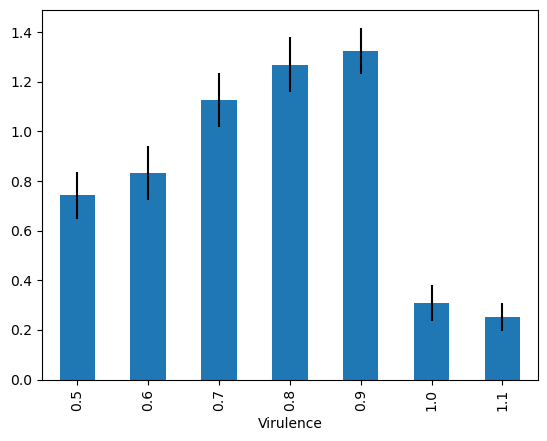

In [90]:
# bar plot with error bars representing standard error
virulance_manipulation['mean'].plot.bar(yerr=virulance_manipulation['std']/np.sqrt(50));

So assuming higher virulence is bad here, the Shannon diversity seems to mostly increase as virulence increases,
though it decreases drastically for virulence level 1.0.  We know our 1.1 level may be problematic
as we were guessing the virulence level to fill in missing values there.  I do wonder if the virulence level
1.0 is also mislabeled (0.1?), as it would make sense that the more diverse a virus is, the more virulent
and dangerous it would be.

## Categorical Attributes

Pandas can include and work with categorical data in a `DataFrame`.  A category is a variable that
takes on a discrete set of values.  To handle categorical data in a NumPy array, and in machine learning
libraries like Scikit-Learn, we usually have to map the categories to integer values (or use other
methods like one-hot encoding).

But when we are doing data analytics, we usually want our categories to have readable, meaningful names, 
even if behind the scenes the categoreis are being mapped to whole numbers like 0, 1, 2,...

Pandas has powerful mechanisms for defining and working with categorical data.

In [91]:
# an example set of data, the second series will be our category
data_dict = {
    'id': [1, 2, 3, 4, 5, 6], # student id
    'raw_grade': ['a', 'b', 'b', 'a', 'a', 'e'], # student grades, but e?
}
df = pd.DataFrame(data_dict)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [92]:
df.dtypes

id            int64
raw_grade    object
dtype: object

Notice that the `raw_grade` attribute is currently an object.  Pandas will not identify and treat 
attributes as categories automatically, because sometimes these can be a general string or text attribute,
but sometimes they are true categories.

We can convert the grade strings to a categorical data type.

In [93]:
df['grade'] = df['raw_grade'].astype('category')

df.grade

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Notice that the type of the new attribute is a category and it has 3 levels `[a, b, e]`.
Internally Pandas represents the category as a mapping, but you can use the 
category names to manipulate and perform operations on the category.

It would now be illegal, for example, to try and change a value in the category to a level that is
not defined for the category.

In [94]:
try:
    df.grade.iloc[-1] = 'f'
except:
    print('TypeError is generated here because f is not a valid category value')

TypeError is generated here because f is not a valid category value


We can rename the category variable labels.  We could change the 'e' to an 'f', or we can use any
labels we want.

In [95]:
#df.grade.cat.categories = ['very good', 'good', 'very bad']
df.grade = df.grade.cat.rename_categories(['very good', 'good', 'very bad'])
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


We can also add new category levels, reorder them, etc.  Notice that the reordering does not change
the existing category labels incorrectly, they still map to the level you would expect.

In [96]:
df.grade = df.grade.cat.set_categories(['very bad', 'bad', 'medium', 'good', 'very good'])
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


For some categories the order makes sense and it is important.  For example, the order defined above will
be used if we want to sort the results by this category attribute.

In [97]:
df.sort_values(by='grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows empty columns.

In [98]:
df.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

And if you convert to a NumPy array, the category levels will be used, so this is useful to 
convert a string category label to an finite integer value.

In [99]:
df['grade_code'] = df.grade.cat.codes
df

,id,raw_grade,grade,grade_code
0,1,a,very good,4
1,2,b,good,3
2,3,b,good,3
3,4,a,very good,4
4,5,a,very good,4
5,6,e,very bad,0


In [100]:
df[ ['id', 'grade_code'] ].values

array([[1, 4],
       [2, 3],
       [3, 3],
       [4, 4],
       [5, 4],
       [6, 0]])